<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [9]:
# SETUP

import numpy as np
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)

# Useful for probability calculations
from scipy import stats
from scipy import special

# Imports for interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Lab Resources

* [`prob 140` Library Documentation](http://prob140.org/prob140/)
* [`datascience` Library Documentation](http://data8.org/datascience/)
* [Prob 140 Code Reference Sheet](http://prob140.org/assets/prob140_code_reference.pdf)

# Lab 2: Total Variation #

In Data 8, you measured the difference between two categorical distributions by calculating the total variation distance between them. In this lab, you will start by interpreting the total variation distance (TVD) in terms of probabilities. You will then use total variation distance to measure the difference between two probability distributions on the non-negative integers. 

This will give you a way to quantify how well one distribution approximates another. 

The focus will be on Poisson distributions, which are often used as approximations to distributions of counts of rare events. In particular, the Poisson $(1)$ distribution approximates the distributions of some random counts that have $1$ as their most likely value.

A random variable $X$ has the Poisson $(1)$ distribution if

$$
P(X = k) ~ = ~ e^{-1} \frac{1}{k!}, ~~~ k \ge 0
$$

This is a probability distribution on infinitely many possible values. We will need that infinite support if we are going to approximate distributions on the values $0, 1, 2, \ldots, n$ for arbitrarily large $n$.

In class we are studying two situations in which probabilities approach those in a Poisson distribution. One is counting the number of matches the matching problem with $n$ letters, when $n$ is large. The other is counting the number of successes in $n$ i.i.d. Bernoulli $(p)$ trials, for large $n$ and small $p$.

In this lab you will look at the entire distribution of the number of matches, and also the binomial $(n, 1/n)$ distribution. You will compare them with their Poisson $(1)$ approximations, both visually and also by a numerical measure of the distance between two distributions. In doing so, you will find an upper bound for the amount of error when you use the approximations to calculate probabilities.

What you will learn:
- The definition of total variation distance (TVD) and its interpretation in terms of the amount of error in approximating probabilities
- The computation of the exact distribution of the number of fixed points (matches) of a random permutation of $n$ letters
- For large $n$, properties of the TVD between the distribution of the number of matches and the Poisson $(1)$ distribution
- For large $n$, properties of the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions

## Instructions
Your labs have two components: a written portion and a portion that also involves code. Written work should be completed on paper, and coding questions should be done in the notebook. You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the lab are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

## Part 1: Total Variation Distance ##

Suppose you have two probability distributions on the same set of possible values $x_1, x_2, \ldots , x_n$. Let the two distributions be $b_1, b_2, \ldots, b_n$ and $g_1, g_2, \ldots, g_n$, where for each $i$ the $b$-distribution assigns probability $b_i$ to the value $x_i$ and the $g$-distribution assigns probability $g_i$.

The *total variation distance* between the two distributions is defined by

$$
tvd(b, g) = 
\frac{1}{2} \sum_{i=1}^n |b_i - g_i| 
$$

The choice of notation comes from the blue and gold colors you will see in overlaid histograms below.

### 1a) [CODE] Computing TVD ###
Define a function `tvd` that takes two probability arrays as arguments and returns the total variation distance between them. You should just assume that both of the input arrays will be probability distributions. You don't have to include code to check that each array is non-negative and sums to $1$.

In [10]:
def tvd(b, g):
    return (1/2)*sum(list(abs(np.array(b) - np.array(g))))

When the two arrays are $b = [0.4, 0.3, 0.2, 0.1]$ and $g = [0.25, 0.35, 0.25, 0.15]$, the histograms look like this:

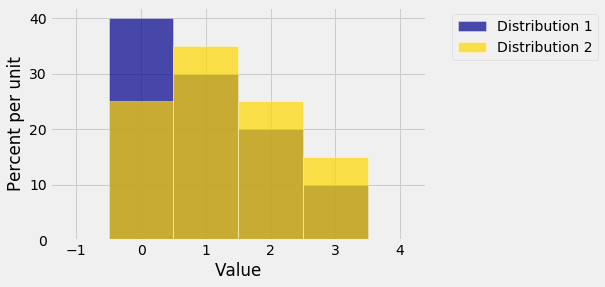

In [11]:
b = make_array(0.4, 0.3, 0.2, 0.1)
g = make_array(0.25, 0.35, 0.25, 0.15)

k = np.arange(4)

blue_dist = Table().values(k).probabilities(b)
gold_dist = Table().values(k).probabilities(g)

Plots('Distribution 1', blue_dist, 'Distribution 2', gold_dist)

Calculate the TVD by mental math. Then run the cell below to confirm that your function `tvd` is working correctly.

In [12]:
tvd(b, g)

0.15

The total variation distance between the two distributions is the total amount by which the areas of the blue bars exceed those of the corresponding gold bars. That's exactly equal to the total amount by which the gold bars exceed the blue.

This is almost apparent from the definition of total variation distance, and you will prove it in homework. Just assume it for now as you did in Data 8. It is an intuitively reasonable measure of the difference between the two distributions.

### 1b) Another Way of Interpreting TVD ###

**This part will be done in section on Wednesday; don't submit it.**

Thus far, our interpretation of total variation distance has been essentially geometric: the amount by which the blue bars exceed the gold. There is an equivalent interpretation in terms of probabilities that makes it easier to understand what the numerical value of the distance is telling us.

Suppose you have a finite set of possible values, and a choice of two probability distributions to use for finding probabilities. For example, the choices might be the exact distribution of a random variable and an approximate distribution. 

**The total variation distance between the two distributions is the biggest difference you can possibly get if you compute the probability of an event using each of the two distributions.**

Formally, if $S$ is the space of all possible values, then the total variation distance between the blue and gold distributions is equal to

$$
\max\{ \big{\lvert} P_{blue}(A) - P_{gold}(A) \big{\rvert} : A \subseteq S\}
$$

This can be shown in a few straightforward steps and you will do that in homework. For now, confirm that it is true for the distributions in **1a**, in the following steps.

- Figure out how many events can be created out of the outcomes $\{0, 1, 2, 3\}$.
- List all the events.
- For each event, compute the absolute difference between the blue and gold probabilities of the event. Your goal is to find the biggest possible absolute difference, so you might not even need to compute each one.
- See which event or events correspond to the biggest absolute difference, and compare the value of that absolute difference with the TVD that you computed in **1a**.

#newpage

## Part 2: Fixed Points of a Random Permutation ##

Let $M_n$ be the number of fixed points in a random permutation of the values $1, 2, 3, \ldots, n$. You can think of $M_n$ as the number of matches when $n$ letters labeled $1$ through $n$ are permuted randomly into $n$ envelopes labeled $1$ through $n$.

[Recall](http://prob140.org/textbook/Chapter_05/03_The_Matching_Problem.html) that the distribution of $M$ is given by 

$$
P(M_n = k) ~ = ~ 
\frac{1}{k!} \cdot \big{(} 1 - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)} \\
$$
for $0 \le k \le n$.

Also, if $n$ is large, recall that for each fixed $k$ we have the approximation 

$$
P(M_n = k) ~ \approx ~ \frac{e^{-1}}{k!}
$$ 

These are the terms in the Poisson $(1)$ distribution.

In this part of the lab you will compare the distribution of $M_n$ with its Poisson $(1)$ approximation.

### 2a) [CODE] Computing $P(M_n = k)$ ###
Complete the definition of the function `prob_matches` that takes $k$ and $n$ as its arguments and returns $P(M_n = k)$. Use as many lines of code as you need.

Use array operations. The `special` module of SciPy has been imported and contains a useful `factorial` method: 

`special.factorial(integer_array)` evaluates to an array consisting of the factorials of all the integers in `integer_array`.

Be careful about signs. Follow the lead of the code provided, and tackle all the positive terms separately from all the negative terms.

In [13]:
def prob_matches(k, n):
    x_even = np.arange(0, n - k + 1, 2)
    x_odd = np.arange(1, n - k + 1, 2)
    
    sum_even = sum(1/special.factorial(x_even))
    sum_odd = sum(1/special.factorial(x_odd))
    #All odd terms are negative, all even terms are positive
    return (1/special.factorial(k))*(sum_even-sum_odd)

To confirm that your function is working correctly, think about what $P(M_n = n-1)$ should be, and then run the cell below to check.

In [14]:
prob_matches(99, 100)

0.0

Use the formula for $P(M_n = k)$ to explain why $P(M_n = 0)$ is very close to $P(M_n = 1)$ when $n$ is large.

The reason $P(M_n = 0)$ and $P(M_n = 1)$ are very close when n is large is because of the $\big{(} 1 - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)}$ section in the formula for $P(M_n = k)$. We can see that as n gets large, $(n-k)$ where $k=0$ is not too far from $(n-k)$ where $k=1$. Using the above example, $\dfrac{1}{99} = 0.010101$, and $\dfrac{1}{100} = 0.01$. Thus, as n approaches infinity, the margin between the fractions $\dfrac{1}{n-1}$ and $\dfrac{1}{n}$ approaches 0.

Now run the cell below and confirm that your function is working correctly.

In [37]:
prob_matches(0, 100), prob_matches(1, 100)

(0.36787944117144233, 0.36787944117144233)

### 2b) [CODE] The Bulk of the Distribution ###
Use `prob_matches` to define a function `match_dist` that takes $n$ as its argument and returns an array consisting of the probabilities $P(M_n = k)$ for $0 \le k \le n$. 

In [16]:
def match_dist(n):
    array = []
    i=0
    while i<=n:
        array.append(prob_matches(i, n))
        i+=1
    return array

The expression `match_dist(100)[0:11]` evaluates to an array consisting of the elements 0 through 10 of the array `match_dist(100)`. 

Explain what the output of the cell below tells you about the distribution of $M_n$. As with most questions about random variables, start by thinking about the possible values of $M_n$.

In [17]:
sum(match_dist(100)[0:11])

0.9999999899522336

The possible values of $M_n$ reflect the chance of matches when $n$ letters labeled $1$ through $n$ are permuted randomly into $n$ envelopes labeled $1$ through $n$. Thus, the first 10 values of the array `match_dist(100)` reflect the chance that 0 or 1 or 2 or...10 letters match with their corresponding envelopes. Thus, we can see that the chance of at least 0 envelopes but less then or equal to 10 envelopes, mathematically, $P(M_n= k)=99.99999899522336$% where $0 \leq k \leq 10$ or  $0 \leq k < 11$.

### 2c) [CODE] Visualization ###
Plot the distribution of $M_{100}$, the number of matches in the matching problem with 100 letters. Use `Plot(dist)` where `dist` is a distribution object created by either:

`Table().values(array_of_values).probabilities(array_of_probabilities)`

or

`Table().values(array_of_values).probability_function(name_of_function)` where `name_of_function` takes a possible value as its argument and returns the probability of that value.


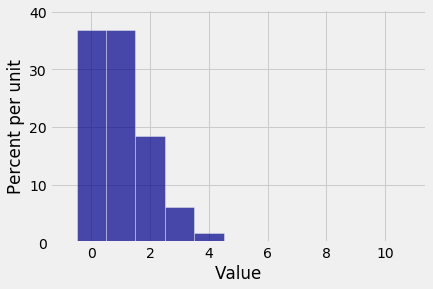

In [18]:
k = np.arange(11)

array_of_probabilities = []

for cell in k:
    array_of_probabilities.append(prob_matches(cell, 100))

matches_100 = Table().values(k).probabilities(array_of_probabilities)
Plot(matches_100)

#newpage

## Part 3: Poisson Approximation to the Matching Distribution ##

Recall from the introduction to the lab that $X$ has the Poisson distribution with parameter 1 if 

$$
P(X = k) ~ = ~ e^{-1} \frac{1}{k!}, ~~~ k \ge 0
$$

The `stats` module of SciPy can be used to calculate the probabilities in this distribution. If `values` is an array of non-negative integers, then

`stats.poisson.pmf(values, 1)`

evaluates to an array of probabilities of the entries in `values`, determined by the Poisson $(1)$ formula above.

The acronym `pmf` stands for "probability mass function". It is common for probabilists to think of the probabilities in the distribution of a discrete random variable as masses attached to the random variable's possible values. 

### 3a) [CODE] The Poisson $(1)$ Distribution ###
Draw a histogram of the Poisson $(1)$ distribution.

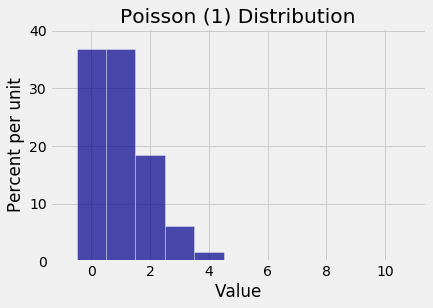

In [19]:
k = np.arange(11)        # selected possible values
poisson_1_probs = stats.poisson.pmf(k, 1)    # array of corresponding Poisson (1) probabilities
poisson_1_dist = Table().values(k).probabilities(poisson_1_probs)
Plot(poisson_1_dist)
plt.title('Poisson (1) Distribution');

Notice:

- The distribution has two modes, at 0 and 1. In exercises you will see why.
- Though there are infinitely many possible values, the set of *probable* values is very small — there is hardly any probability visible beyond the value 4.
- The distribution is extremely similar to the distribution of the number of matches in **2c**.

### 3b) [CODE] TVD Between the Matching Distribution and its Poisson Approximation ###
Use the `stats` module and functions you have already defined in this lab to define a new function `matches_Poisson_tvd` that takes $n$ as its argument and returns the total variation distance between the distribution of the number of matches $M_n$ and the Poisson $(1)$ distribution.

Though the Poisson distribution has infinite support, you have seen that almost all of the probability is concentrated on just a few small values. So it's fine to compute the Poisson $(1)$ probabilities only for $0, 1, 2, \ldots, n$, the possible numbers of matches.

In [83]:
def matches_Poisson_tvd(n):
    k = np.arange(n + 1)
    return tvd(match_dist(n),stats.poisson.pmf(k,1) )

To see if the value that your function is returning make sense, start by looking at the distribution of $M_5$, the number of matches if you just have 5 letters.

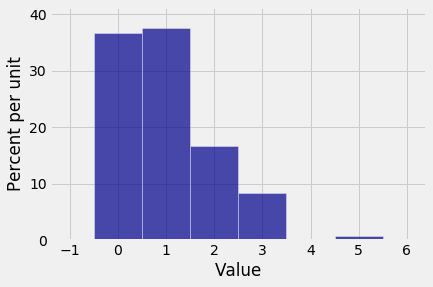

In [84]:
matches_5 = Table().values(np.arange(6)).probabilities(match_dist(5))
Plot(matches_5)

Which do you think should be larger: `matches_Poisson_tvd(5)` or `matches_Poisson_tvd(100)`? Why?

`matches_Poisson_tvd(5)` will be larger because the poisson(1) approximation of a binomial distribution becomes more accurate as n approaches infinity. A good way to think about this is that the binomial actually approaches the poisson(1) as n approaches infinity, and so the poisson(1) becomes a good approximation of the binomial. Thus, since 100 is larger then 5, the poisson approximation will be more accurate for the binomial distribution of n = 100 vs n = 5, and so 5 will have a larger error and total variation distance.

Run the cell below to see that your function behaves consistently with your answer above.

In [81]:
matches_Poisson_tvd(5), matches_Poisson_tvd(100)

(0.03411123088143108, 2.0236745963801594e-17)

### 3d) [CODE] Error in the Approximation ###
Let $a$ and $b$ be two integers with $0 \le a < b \le 100$. Suppose you approximate $P(a \le M_{100} \le b)$ by $\sum_{k=a}^b e^{-1}\frac{1}{k!}$. What is the largest possible error you could make?

In [96]:
2*matches_Poisson_tvd(100)

4.047349192760319e-17

The more letters you have, the better the approximation is. To visualize this, extend `tvd_table` below with a column labeled `Matches (n)` that contains the total variation distance between the exact distribution of the number of matches and its Poisson $(1)$ approximation. In each row, the number of letters $n$ is given by the entry in Column 0. 

In [97]:
tvd_table = Table().with_column('n', np.arange(5, 101))

matches_tvds = tvd_table.apply(matches_Poisson_tvd, 'n')

tvd_table = tvd_table.append_column('Matches (n)', matches_tvds)

tvd_table

n,Matches (n)
5,0.0341112
6,0.0100777
7,0.00258417
8,0.000585866
9,0.000119094
10,2.19485e-05
11,3.70026e-06
12,5.74911e-07
13,8.28377e-08
14,1.11286e-08


Use the `Table` method `plot` to draw a line plot of the TVDs as a function of $n$.

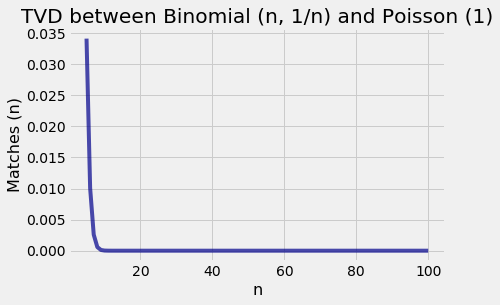

In [100]:
tvd_table.plot('n')
plt.title('TVD between Binomial (n, 1/n) and Poisson (1)');

Note how sharply the graph falls. For $n \ge 10$ or so, there is almost no error at all in using the Poisson $(1)$ distribution to approximate the distribution of $M_n$.

#newpage

## Part 4. Poisson $(1)$ Approximation to Binomial Distributions ##

Roughly stated, a theorem we proved in class says that if $n$ is large and $p$ is small, then the binomial $(n, p)$ probabilities are close to Poisson $(np)$ probabilities. 

Therefore for large $n$, binomial $(n, 1/n)$ probabilities should be close to Poisson $(1)$ probabilities.

### 4a) [CODE] Binomial $(10, 1/10)$ Distribution ###
If `values` is an array of integers in the range 0 through $n$, then

`stats.binom.pmf(values, n, p)`

evaluates to an array of the binomial $(n, p)$ probabilities of the entries in `values`.

Display a histogram of the binomial $(10, 1/10)$ distribution. Notice how the probabilities are concentrated on the low values. This is a signal to start thinking about Poisson approximations, even though the number of trials ($n = 10$) isn't very large.

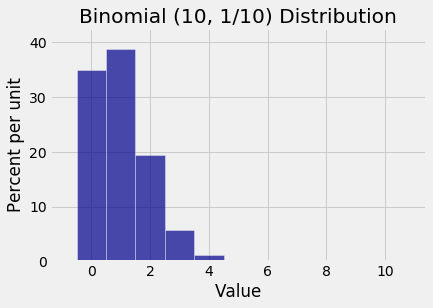

In [101]:
# binomial (n, 1/n) distribution

n = 10                             # number of trials

k = np.arange(n+1)                         # possible values
binom_probs =  stats.binom.pmf(k, n, 1/n)            # binomial (n, 1/n) probabilities


binom_dist = Table().values(k).probabilities(binom_probs)

Plot(binom_dist)
plt.title('Binomial (10, 1/10) Distribution');

Since $n = 10$ isn't very large, this distribution doesn't look exactly like the Poisson $(1)$ distribution though the two have many similarities. Run the cell below to see the overlaid histograms.

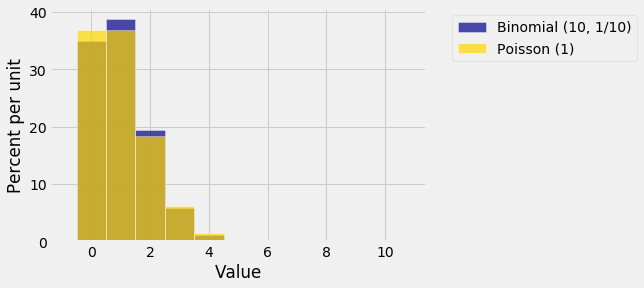

In [102]:
poisson_1_probs = stats.poisson.pmf(k, 1)
poisson_1_dist = Table().values(k).probabilities(poisson_1_probs)

Plots('Binomial (10, 1/10)', binom_dist, 'Poisson (1)', poisson_1_dist)

At this point it will come as no surprise that the Poisson $(1)$ approximation gets better as $n$ increases. You will quantify this in the remaining exercises below.

### 4b) [CODE] TVD between the Binomial $(n, 1/n)$ Distribution and its Poisson Approximation ###
Define a function `binomial_Poisson_tvd` that takes $n$ as its argument and returns the total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions. As before, it's fine to compute the Poisson $(1)$ probabilities only on 0 through $n$, the possible values of the binomial.

In [103]:
def binomial_Poisson_tvd(n):
    k = np.arange(n+1)
    return tvd(stats.binom.pmf(k, n, 1/n) , stats.poisson.pmf(k, 1))

As a check to see if your function is working correctly, run the cell below. The output should be about $1$%.

In [104]:
binomial_Poisson_tvd(30)

0.009379738441886479

### 4c) [CODE] Error in Approximation ###
Extend `tvd_table` defined earlier with a column labeled `'Binomial (n, 1/n)'` that contains the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions, where in each row $n$ is given by the entry in Column 0.

In [105]:
binom_tvds = tvd_table.apply(binomial_Poisson_tvd, 'n')

tvd_table = tvd_table.append_column('Binomial (n, 1/n)', binom_tvds)

tvd_table

n,Matches (n),"Binomial (n, 1/n)"
5,0.0341112,0.0622837
6,0.0100777,0.0509556
7,0.00258417,0.0430299
8,0.000585866,0.0372241
9,0.000119094,0.0327973
10,2.19485e-05,0.0293116
11,3.70026e-06,0.0264958
12,5.74911e-07,0.0241737
13,8.28377e-08,0.0222259
14,1.11286e-08,0.0205686


Run the cell below to get overlaid line plots of the two TVD columns as functions of $n$.

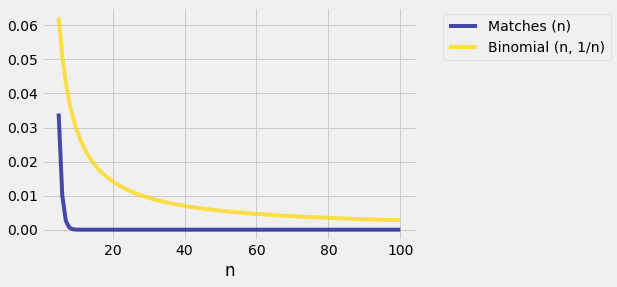

In [106]:
tvd_table.plot(0)

The graph of the binomial-Poisson TVDs drops sharply, though not as sharply as the matches-Poisson TVD graph. 

Fill in the blanks (use the code cell below if you need to):

For values of $n$ that are about $\underline{56}$ or more, Poisson $(1)$ approximations to binomial $(n, 1/n)$ probabilities will be off by at most 0.5%. 

**Your answer here** For values of $n$ that are about $\underline{56}$ or more, Poisson $(1)$ approximations to binomial $(n, 1/n)$ probabilities will be off by at most 0.5%. 

In [142]:
i = 0
value = []
for cell in tvd_table.column('Binomial (n, 1/n)'):
    if cell <= 0.005:
        value.append(tvd_table.column('n')[i])
        value.append(cell)
        break
    i += 1
value

[56, 0.004978875761698453]

Now you can use total variation distance to help answer the question, "How large does $n$ have to be before I can use the Poisson $(1)$ approximation to the binomial $(n, 1/n)$ distribution?" 

- First decide how much error you are prepared to tolerate in your approximations. 
- Then use `tvd_table` (or an extended one with larger values of $n$) to find the smallest $n$ for which the TVD is below your threshold error. 
- For that $n$ or larger, the error in your Poisson $(1)$ probability approximations will be below your threshold.

## Conclusion ##
What you have learned in this lab:
- If you use an approximation to the distribution of $X$, then the total variation distance between the exact and approximate distributions measures the worst error you can make in approximating probabilities of events determined by $X$. You didn't prove that in the lab but you will for homeowrk.
- The total variation distance between the distribution of the number of matches in a random permutation of $n$ elements and its Poisson $(1)$ approximation falls very sharply. By about 10 elements or so, you might as well use the Poisson distribution for the number of matches.
- The total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions falls sharply as a function of $n$ and is below 1% even for moderate values of $n$.
- Many random variables in this lab have a large number of possible values, and the approximating Poisson distribution has infinitely many possible values. But no matter how large $n$ is, the *probable* values of all the variables are in a very small range — 0 through about 8 or 10 — because all of the distributions are roughly Poisson $(1)$.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general Lab 2 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Lab 2 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**